fcond001@gold.ac.uk

Filip Condac

Student Number: 33643814

I worked alone

I chose to use random forest, decision trees, and k-nearest neighbours. These models, in my opinion, are appropriate for this purpose because they handle classification issues well and can manage non-linear connections between variables.

Random forest is an ensemble learning technique that uses multiple decision trees to make predictions. It is an algorithm that can handle both categorical and numerical data. We have a combination of categorical and numerical data in this work, therefore random forest is a good option.

Another algorithm that performs well for classification issues is the decision tree. It is a good option for this assignment because it is simple to understand and visualise.

A straightforward but efficient technique for classification tasks is K-nearest neighbours. The approach, which is non-parametric, can deal with non-linear interactions between variables. K-nearest neighbours are capable of handling both categorical and numerical data, which are both present in this challenge.


For my cross validation I used grid search, this chooses and tunes the provided hyperparameters for this project in order to get the best results.

**There were not many param options as the processing time was taking hours. I am aware this affects cross validation but I was not able to do anything about it on my laptop**

In [21]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:
# load data
train_data = pd.read_csv('creditdefault_train.csv')
test_data = pd.read_csv('creditdefault_test.csv')

# split features and target
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

**K-Nearest Neigbours**

In [29]:
print('K-Nearest Neighbors')
knn = KNeighborsClassifier()
params = {'n_neighbors': [1, 3, 5], 'p': [1, 2]}
grid_search = GridSearchCV(knn, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
knn_recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
knn_f1_score = f1_score(y_test, y_pred, average='weighted')

print(f'K-Nearest Neighbors\nAccuracy: {knn_accuracy}\nPrecision: {knn_precision}\nRecall: {knn_recall}\nF1 Score: {knn_f1_score}\n')


K-Nearest Neighbors


/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


K-Nearest Neighbors
Accuracy: 0.22273333333333334
Precision: 0.4471054834687709
Recall: 0.22273333333333334
F1 Score: 0.15484010836635498



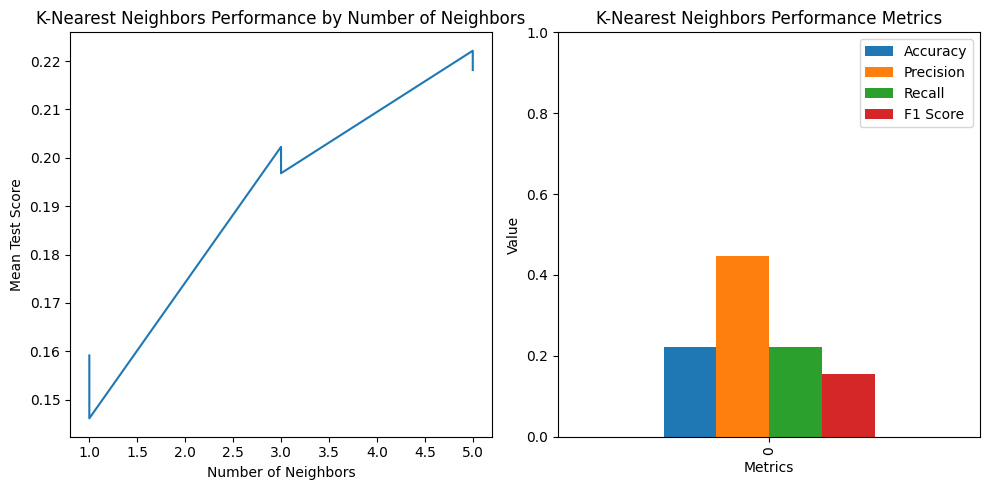

In [34]:
import matplotlib.pyplot as plt

# visualize K-Nearest Neighbors performance by number of neighbors
knn_results = pd.DataFrame(grid_search.cv_results_)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
axs[0].plot(knn_results['param_n_neighbors'], knn_results['mean_test_score'])
axs[0].set_xlabel('Number of Neighbors')
axs[0].set_ylabel('Mean Test Score')
axs[0].set_title('K-Nearest Neighbors Performance by Number of Neighbors')

# visualize K-Nearest Neighbors performance by performance metric
knn_metrics = pd.DataFrame({
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'F1 Score': knn_f1_score
}, index=[0])
knn_metrics.plot(kind='bar', ax=axs[1])
axs[1].set_title('K-Nearest Neighbors Performance Metrics')
axs[1].set_xlabel('Metrics')
axs[1].set_ylabel('Value')
axs[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()



**Decision Trees**

In [36]:
# Decision Trees
print('Decision Trees')
dt = DecisionTreeClassifier()
params = {'max_depth': [3, 5, 7]}
grid_search = GridSearchCV(dt, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred, average='weighted' , zero_division=1)
dt_recall = recall_score(y_test, y_pred, average='weighted' , zero_division=1)
dt_f1_score = f1_score(y_test, y_pred, average='weighted')

print(f'Decision Trees\nAccuracy: {dt_accuracy}\nPrecision: {dt_precision}\nRecall: {dt_recall}\nF1 Score: {dt_f1_score}\n')

Decision Trees


/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Decision Trees
Accuracy: 0.2779333333333333
Precision: 0.6702780835818645
Recall: 0.2779333333333333
F1 Score: 0.17025704410924197



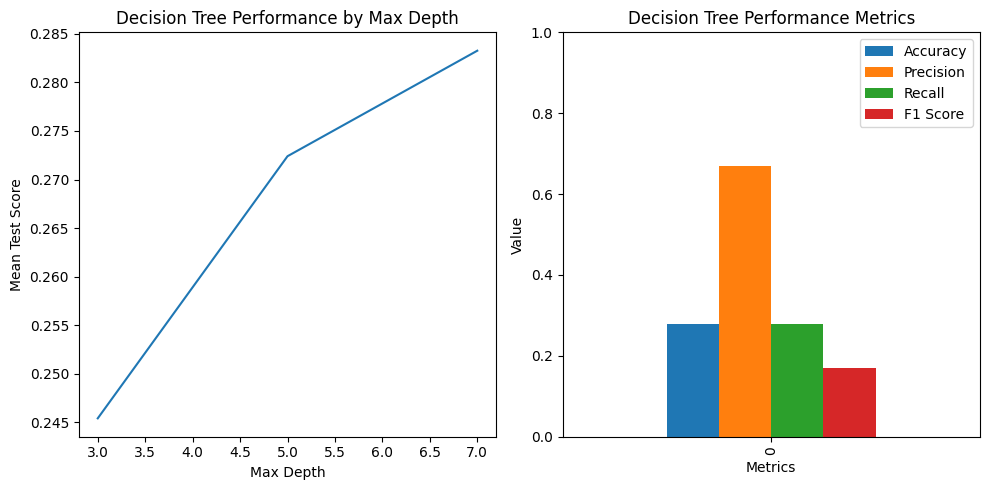

In [39]:
# visualize Decision Tree performance by max depth
dt_results = pd.DataFrame(grid_search.cv_results_)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(dt_results['param_max_depth'], dt_results['mean_test_score'])
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Mean Test Score')
ax1.set_title('Decision Tree Performance by Max Depth')

# visualize Decision Tree performance by performance metric
dt_metrics = pd.DataFrame({
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'F1 Score': dt_f1_score
}, index=[0])
dt_metrics.plot(kind='bar', ax=ax2)
ax2.set_title('Decision Tree Performance Metrics')
ax2.set_xlabel('Metrics')
ax2.set_ylabel('Value')
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()


**Random Forest**

In [49]:
# Random Forest
print('Random Forest')
rf = RandomForestClassifier()
params = {'n_estimators': [50], 'max_depth': [2, 4, 6, 8, 10]}
grid_search = GridSearchCV(rf, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
rf_recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
rf_f1_score = f1_score(y_test, y_pred, average='weighted', zero_division=1)
print(f'Random Forest\nAccuracy: {rf_accuracy}\nPrecision: {rf_precision}\nRecall: {rf_recall}\nF1 Score: {rf_f1_score}\n')

Random Forest


/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Random Forest
Accuracy: 0.30466666666666664
Precision: 0.662211599393204
Recall: 0.30466666666666664
F1 Score: 0.18152390138778818



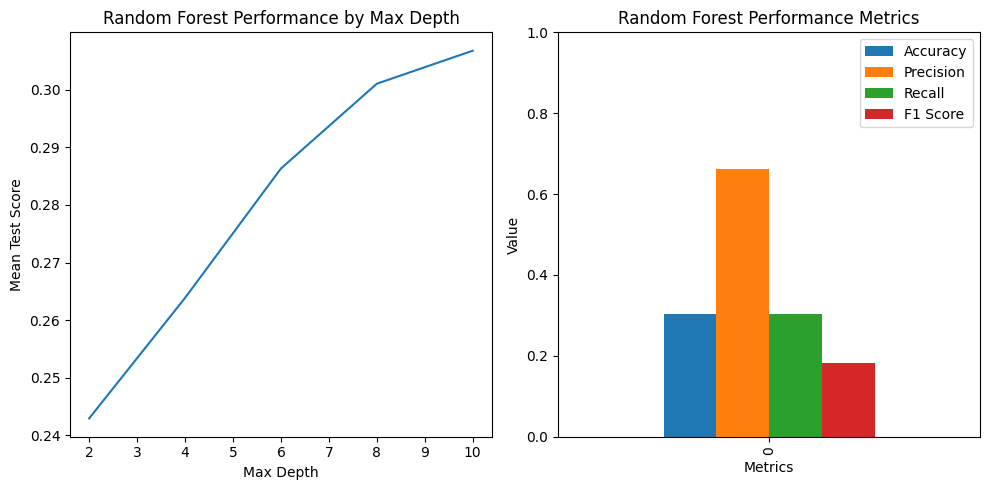

In [50]:
rf_results = pd.DataFrame(grid_search.cv_results_)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(rf_results['param_max_depth'], rf_results['mean_test_score'])
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Mean Test Score')
ax1.set_title('Random Forest Performance by Max Depth')

# visualize Random Forest performance by performance metric
rf_metrics = pd.DataFrame({
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1 Score': rf_f1_score
}, index=[0])
rf_metrics.plot(kind='bar', ax=ax2)
ax2.set_title('Random Forest Performance Metrics')
ax2.set_xlabel('Metrics')
ax2.set_ylabel('Value')
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()


In [56]:
print(f'K-Nearest Neighbors\nAccuracy: {knn_accuracy:.5f}\nPrecision: {knn_precision:.5f}\nRecall: {knn_recall:.5f}\nF1 Score: {knn_f1_score:.5f}\n')
print(f'Decision Trees\nAccuracy: {dt_accuracy:.5f}\nPrecision: {dt_precision:.5f}\nRecall: {dt_recall:.5f}\nF1 Score: {dt_f1_score:.5f}\n')
print(f'Random Forest\nAccuracy: {rf_accuracy:.5f}\nPrecision: {rf_precision:.5f}\nRecall: {rf_recall:.5f}\nF1 Score: {rf_f1_score:.5f}\n')


K-Nearest Neighbors
Accuracy: 0.22273
Precision: 0.44711
Recall: 0.22273
F1 Score: 0.15484

Decision Trees
Accuracy: 0.27793
Precision: 0.67028
Recall: 0.27793
F1 Score: 0.17026

Random Forest
Accuracy: 0.30467
Precision: 0.66221
Recall: 0.30467
F1 Score: 0.18152

